# Gold Price Prediction
This is a regression problem. 


In [1]:
# Data loading

import pandas as pd
import numpy as np

dataset = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


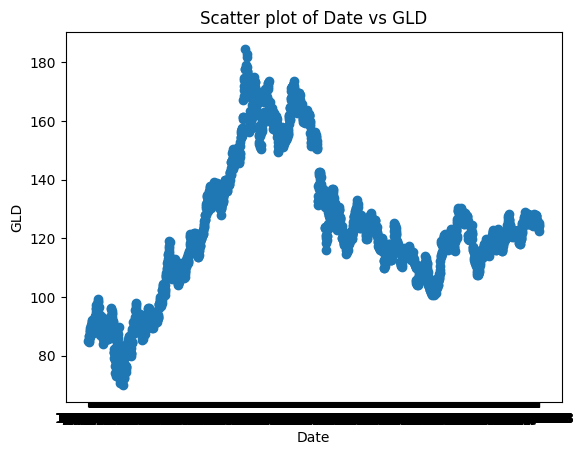

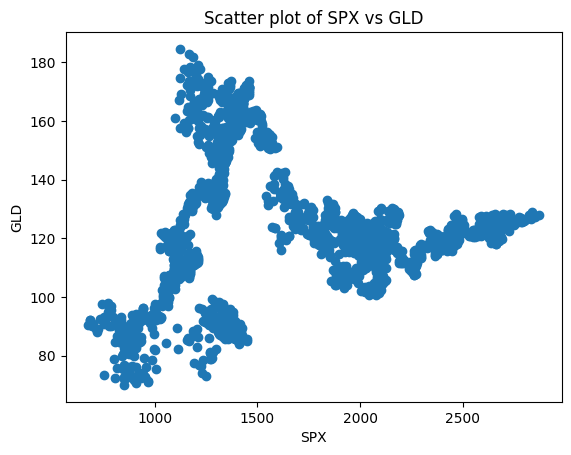

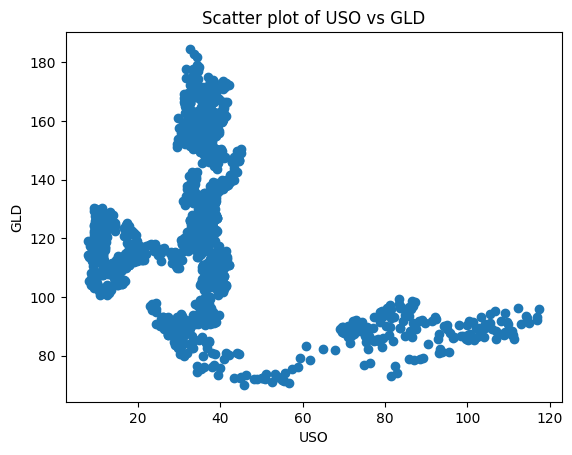

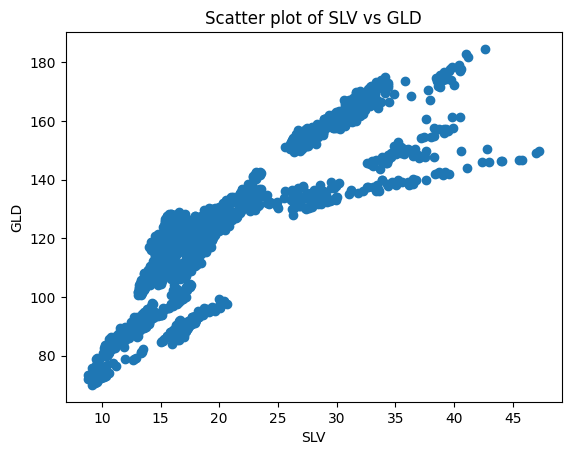

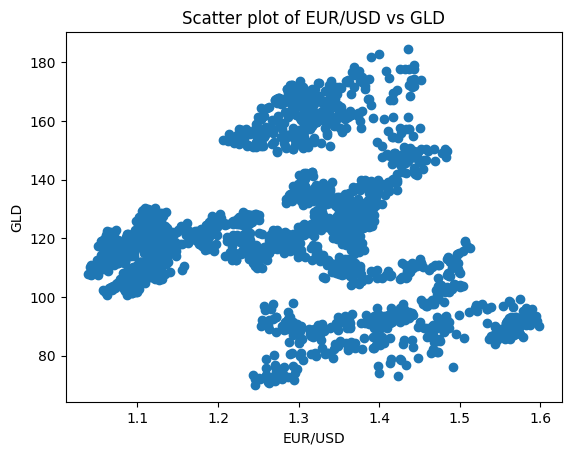

In [2]:
# See the scatter plots 

import matplotlib.pyplot as plt

output_variable = 'GLD'  # Replace with the actual name of your output variable

for column in dataset.columns:
    if column != output_variable:
        plt.scatter(dataset[column], dataset[output_variable])
        plt.xlabel(column)
        plt.ylabel(output_variable)
        plt.title(f'Scatter plot of {column} vs {output_variable}')
        plt.show()


# Scatter Plot Analysis
From the plot it is clear that the range values of each feature is different. So we need to use standard scaller to Standardize the data so that the gradient decent algorithm converges properly

<Axes: >

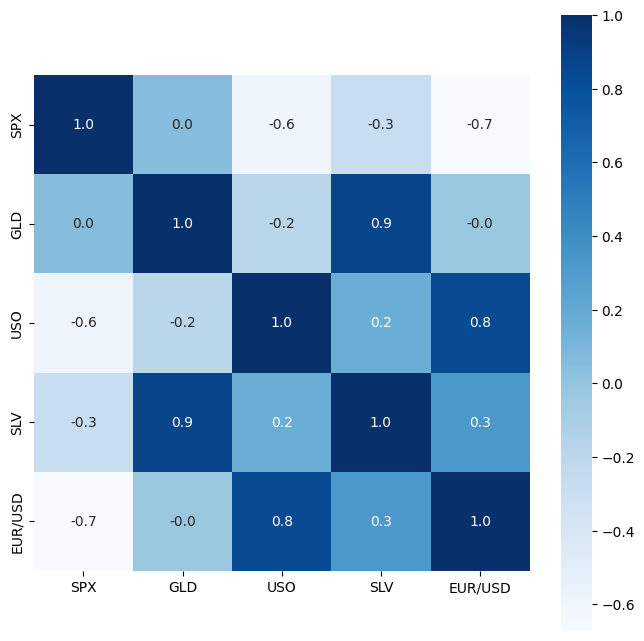

In [3]:
# Correlation

import seaborn as sns

plt.figure(figsize= (8,8))
correlation = dataset.drop('Date', axis = 1).corr()

sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot= True, cmap = 'Blues') 

# Correlation Analysis
From the above correlation heatmap, It is clear that Gold and Silver are very much positively correlated. 

In [4]:
# Feature and Label seperation

X = dataset.drop(columns=['Date', 'GLD'], axis = 1)
y = dataset['GLD']

print(X.shape, y.shape)

(2290, 4) (2290,)


In [5]:
# Standardize X 

from sklearn.preprocessing import StandardScaler # It performs z-score normalization

# peak to peak range before normilizing
print("Before Normalizing : ", np.ptp(X, axis= 0))

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

print("After Normalizing : ", np.ptp(X_norm, axis = 0))



Before Normalizing :  SPX        2196.340088
USO         109.520003
SLV          38.409998
EUR/USD       0.559751
dtype: float64
After Normalizing :  [4.23188395 5.61087038 5.41671169 4.25606313]


In [6]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 1)
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


# Model selection

In [8]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 12, number of weight updates: 21985.0


In [9]:
# View perameters

b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [ 3.38607121 -4.91048693 22.44842478 -1.31587955], b:[122.7818346]


In [11]:
# make a prediction using sgdr.predict()

y_pred_sgd = sgdr.predict(X_test)
# make a prediction using w,b. 
y_pred = np.dot(X_test, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

prediction using np.dot() and sgdr.predict match: True


In [17]:
# Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error : ",mae)
print("Mean Squared Error : ", mse)
print("R Square Error : ", r2)

Mean Absolute Error :  6.211384466183841
Mean Squared Error :  68.80275522648705
R Square Error :  0.8696301137945771


In [32]:
y_test = list(y_test)
y_pred = list(y_pred)

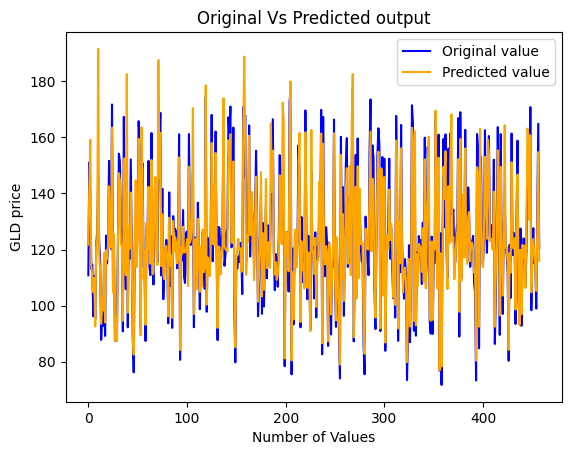

In [31]:
plt.plot(y_test, color= 'Blue', label = 'Original value')
plt.plot(y_pred, color = 'Orange', label = 'Predicted value')
plt.title("Original Vs Predicted output")
plt.xlabel("Number of Values")
plt.ylabel("GLD price")
plt.legend()
plt.show()